<a href="https://colab.research.google.com/github/kjdatamc/Data110/blob/main/KHatton_week5_data110_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5: Uncovering Insights from the Titanic Dataset

## Loading the Dataset:
The Titanic dataset can be accessed from the Seaborn library. Use the following code to load the dataset:

```python
import seaborn as sns
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# View the first few rows of the dataset
titanic.head()
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import pandas as pd

In [2]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# View the first few rows of the dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Part 1: Understanding the Dataset

### 1. **Task 1: Dataset Overview**  
   - Briefly describe the Titanic dataset. What kind of information is contained in each column?  
   - *Deliverable*: Write a paragraph summarizing the dataset based on your exploration.

#### 🔷 Summary of Titanic dataset
The Titanic dataset contains information about 891 passengers, with details across 15 columns. There appear to be three pairs of columns that are a 1 to 1 translation of the information into an alternative data type: `survived` & `alive`, `pclass` & `class`, and `embarked` & `embark_town`. For example, `pclass` is an *int64* data type while `class` is a *category*. It's easy to see the relationship where _"1"_ in `pclass` equates to _"first"_ in  `class`. It was more difficult to understand the meaning of `sibsp` and `parch`, which both seemed to relate to the `alone` column because a non-zero value in either would show a _"false"_ in `alone`. `SibSp` represents the number of siblings or spouses traveling with the passenger; `ParCh` is the number of parents or children traveling with them. Most of the columns contain data for all passengers, but `age` is missing for nearly 20% of passengers and `deck` is lacking for over 75% of passengers. Two appear to not have their `embarked`/`embark_town` listed.

A particularly interesting choice is dedicating a column to whether or not a passenger was an adult male. One might guess that this was done because of the tendency to prioritize women and children (people that are not adult males) for evacuation. Having this column would allow for easier grouping in that way when examining the data.

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.tail(15)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
876,0,3,male,20.0,0,0,9.8458,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False


## Part 2: Fare and Survival Analysis

### 2. **Task 2: Fare Distribution**  
   - Plot a histogram and KDE for the distribution of fares paid by passengers.  
   - *Question*: What trends or outliers do you observe in the fare distribution? How might fare impact survival rates?

#### 🔷 Response to Task 2 Question

These visualizations show that the vast majority of fares appear to be less than 50, which makes sense given that the `describe()` function identified 31 as the 3rd Quartile. The peak appears to be around 10 to 15, which again aligns well with the median identifed at about 14.5. There are a few fares between 100 and 200, and fewer still between 200 and 300. Finally, we can see two outlier fares at around 512.

It is likely that fare would have impacted survival rates, as those passenger who paid a higher fare would probably have been in a higher class and thus would have been prioritized during evacuation.

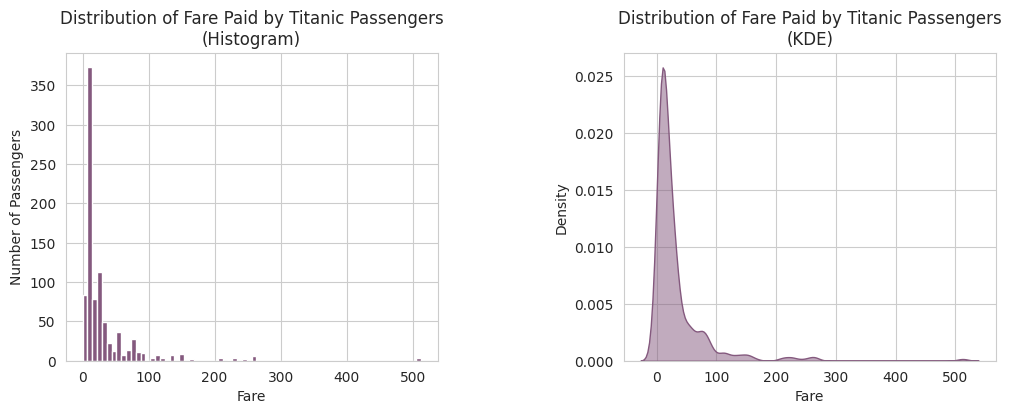

In [6]:
# Set style
sns.set_style('whitegrid')

# Plot histogram and KDE for fares paid by passengers
plt.figure(figsize=(12, 4))
plt.subplots_adjust(wspace=0.5)

# Histogram
plt.subplot(1, 2, 1)
plt.hist(titanic['fare'],bins=70, color='#84597e')
plt.title('Distribution of Fare Paid by Titanic Passengers\n(Histogram)')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')

# KDE
plt.subplot(1, 2, 2)
sns.kdeplot(titanic['fare'], fill=True, bw_adjust=0.7, color='#84597e', alpha=0.5)
plt.title('Distribution of Fare Paid by Titanic Passengers\n(KDE)')
plt.xlabel('Fare')

plt.show()

### 3. **Task 3: Fare and Survival Rates**  
   - Create a KDE plot to compare the fare distributions for survivors and non-survivors.  
   - *Question*: Does fare seem to have influenced survival? What do the distributions suggest about socioeconomic status and survival?

#### 🔷 Response to Task 3 Question

Yes, fare does seem to have influenced survival. The KDE for non-survivors has more of the distribution concentrated at the lower fares, with an extreme spike near or slightly below the median fare. Conversely, the KDE for survivors doesn't have such a dramatic spike, with a more spread out distribution that peaks higher than the median fare at around 20. The survivors group also appear to include many of the high outlier fares.

This distribution suggests that wealthier people were prioritized during evacuation and rescue. Being of a higher socioeconomic status increased your chance of surviving, while being of a lower socioeconomic status increased your risk of dying.

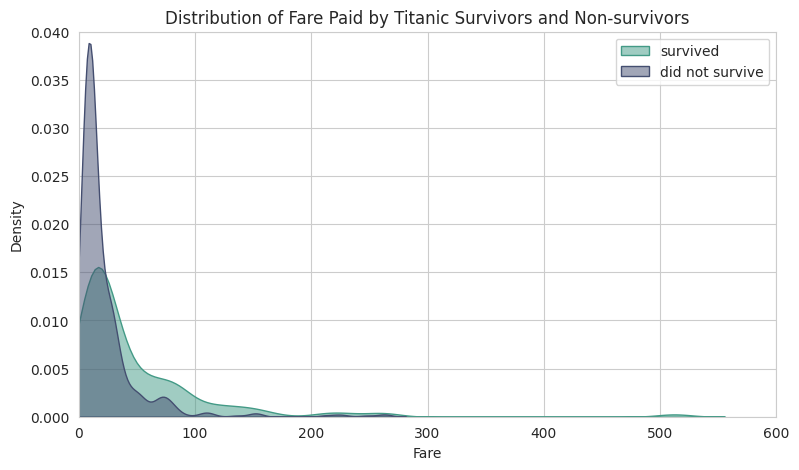

In [9]:
# Plot KDE comparing fare distribution for survivors and non-survivors

plt.figure(figsize=(9, 5))

sns.kdeplot(titanic[titanic['survived'] == 1]['fare'], fill=True, bw_adjust=0.7, color='#439A86', alpha=0.5, label='survived')
sns.kdeplot(titanic[titanic['survived'] == 0]['fare'], fill=True, bw_adjust=0.7, color='#444E70', alpha=0.5, label='did not survive')
plt.xlabel('Fare')
plt.title('Distribution of Fare Paid by Titanic Survivors and Non-survivors')
plt.legend()
plt.xlim(0,600)
plt.ylim(0,0.04)


plt.show()

## Part 3: Class, Fare, and Survival Insights

### 4. **Task 4: Passenger Class, Fare, and Survival**  
   - Create histograms and KDE plots to compare fare distributions across different passenger classes (`Pclass`) and analyze survival rates for each class.  
   - *Question*: What patterns do you observe in fare distribution and survival rates across different classes? How does this reflect the socioeconomic divisions on the Titanic?

#### 🔷 Response to Task 4 Question

We can see in the KDE plots that Third Class fare tended to be the lowest, while First class was the highest. This isn't surprising, but it is surprising to see fares around 60-70 in both Second and Third Class. Second Class fares appear to have two significant peaks, around 15 and 25, suggesting perhaps different types of Second Class tickets. It would take more investigation, but perhaps the embark city could make a difference there. First Class has the largest distribution of fares, with the main peak around 50, but quite a few over 100. Again, it could be that there are different types of First Class tickets that afford more amenities or allow for more cargo, which could have impacted the price.

Comparing the diverging histograms, it's clear that being in a higher class increased your chance of survival. The visualization shows more First Class passengers survived than did not, while fewer Third Class passengers survived than didn't. It's hard to tell if more Second Class passengers survived than did not; it appears fairly equal. Given the visible difference in survival rates between the clasess, it's reasonable to assume that higher socioeconomic class passengers were given priority during evacuation and rescue. It's also possible that they were on deck levels that allowed them better routes of escape.

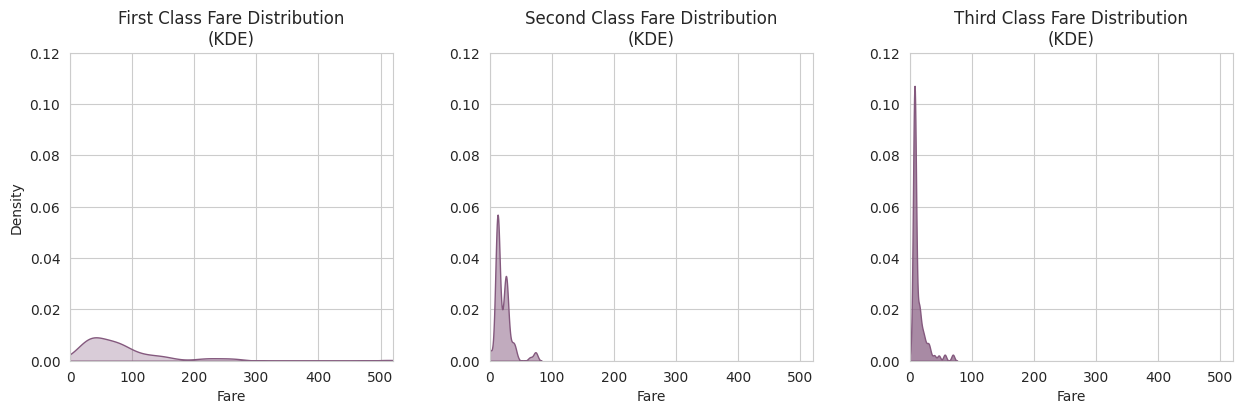

In [12]:
# Plot KDEs of each class's fare distribution
# Opt for side-by-side because overlapping would be difficult to interpret with three distributions
# Maintain same x and y limits for easier 1 to 1 visual comparison

# create data frames for each class
tf_first = titanic[titanic['pclass'] == 1]
tf_second = titanic[titanic['pclass'] == 2]
tf_third = titanic[titanic['pclass'] == 3]

plt.figure(figsize=(15, 4))
plt.subplots_adjust(wspace=0.3)

#1st
plt.subplot(1, 3, 1)
sns.kdeplot(tf_first['fare'], fill=True, bw_adjust=0.7, color='#84597e', alpha=0.3)
plt.title('First Class Fare Distribution\n(KDE)')
plt.xlabel('Fare')
plt.xlim(0,520)
plt.ylim(0,0.12)

#2nd
plt.subplot(1, 3, 2)
sns.kdeplot(tf_second['fare'], fill=True, bw_adjust=0.7, color='#84597e', alpha=0.5)
plt.title('Second Class Fare Distribution\n(KDE)')
plt.xlabel('Fare')
plt.xlim(0,520)
plt.ylim(0,0.12)
plt.ylabel('')

#3rd
plt.subplot(1, 3, 3)
sns.kdeplot(tf_third['fare'], fill=True, bw_adjust=0.7, color='#84597e', alpha=0.7)
plt.title('Third Class Fare Distribution\n(KDE)')
plt.xlabel('Fare')
plt.xlim(0,520)
plt.ylim(0,0.12)
plt.ylabel('')

plt.show()

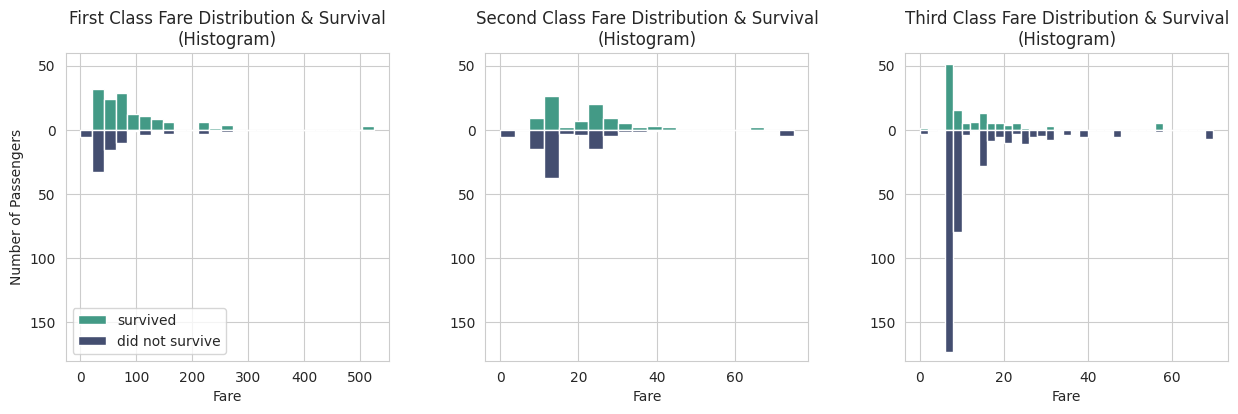

In [13]:
# Plot Histograms of each class's fare distribution x survival
# Opt for diverging histograms as they give a clearer sense of survival rate than overlapping KDE would
# Maintain same y limits for easier 1 to 1 visual comparison,
#   but adjusted x limits to ensure 2nd and 3rd class were visible

plt.figure(figsize=(15, 4))
plt.subplots_adjust(wspace=0.3)

tf_1_S = tf_first[tf_first['survived'] == 1]
tf_2_S = tf_second[tf_second['survived'] == 1]
tf_3_S = tf_third[tf_third['survived'] == 1]

tf_1_N = tf_first[tf_first['survived'] == 0]
tf_2_N = tf_second[tf_second['survived'] == 0]
tf_3_N = tf_third[tf_third['survived'] == 0]

#1st w color legend applying to all
plt.subplot(1, 3, 1)
plt.hist(tf_1_S['fare'], bins=25, range=[0,525], color='#439A86', label='survived')
plt.hist(tf_1_N['fare'], bins=25, range=[0,525], color='#444E70', label='did not survive',
         weights=[-1] * len(tf_1_N))
plt.title('First Class Fare Distribution & Survival\n(Histogram)')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.ylim(-180,60)
plt.yticks([-150, -100, -50, 0, 50], [150, 100, 50, 0, 50])

plt.legend(loc='lower left')

#2nd
plt.subplot(1, 3, 2)
plt.hist(tf_2_S['fare'], bins=20, range=[0,75], color='#439A86', label='survived')
plt.hist(tf_2_N['fare'], bins=20, range=[0,75],  color='#444E70', label='did not survive',
         weights=[-1] * len(tf_2_N))
plt.title('Second Class Fare Distribution & Survival\n(Histogram)')
plt.xlabel('Fare')
plt.ylim(-180,60)
plt.yticks([-150, -100, -50, 0, 50], [150, 100, 50, 0, 50])

#3rd
plt.subplot(1, 3, 3)
plt.hist(tf_3_S['fare'], bins=35, range=[0,70], color='#439A86',  label='survived')
plt.hist(tf_3_N['fare'], bins=35, range=[0,70], color='#444E70', label='did not survive',
         weights=[-1] * len(tf_3_N))
plt.title('Third Class Fare Distribution & Survival\n(Histogram)')
plt.xlabel('Fare')
plt.ylim(-180,60)
plt.yticks([-150, -100, -50, 0, 50], [150, 100, 50, 0, 50])

plt.show()

## Part 4: Age and Survival

### 5. **Task 5: Age of Survivors and Non-Survivors**  
   - Create KDE plots to compare the age distributions of survivors and non-survivors.  
   - *Question*: What trends do you notice in the age distribution of survivors compared to those who did not survive? How might age have impacted survival rates?

#### 🔷 Response to Task 5 Question

The age distribution of survivors and non-survivors is overall fairly similar. The most meaningful difference is the large secondary peak for survivors around 5 years old. This is almost certainly because children were prioritized during evactuation and rescue. Aside from the distinction between child and adult, there doesn't seem to be any other strong indication that the ages of adults significantly impacted their survival. The higher peak for non-survivors around 25 years old might suggest that younger adults weren't given priority, but that's difficult to assess with the KDE. There's also a slightly lower rate of survival for older passengers in their 60s and 70s.

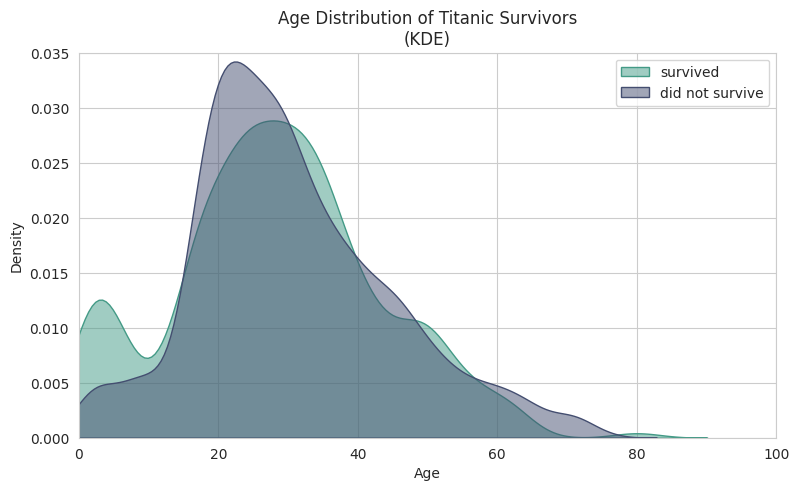

In [15]:
# Plot KDE of survival by age

plt.figure(figsize=(9, 5))

sns.kdeplot(titanic[titanic['survived'] == 1]['age'], fill=True, bw_adjust=0.7, color='#439A86', alpha=0.5, label='survived')
sns.kdeplot(titanic[titanic['survived'] == 0]['age'], fill=True, bw_adjust=0.7, color='#444E70', alpha=0.5, label='did not survive')
plt.title('Age Distribution of Titanic Survivors\n(KDE)')
plt.xlabel('Age')
plt.xlim(0,100)
plt.ylim(0,0.035)
plt.legend()

plt.show()

### 6. **Task 6: Pyramid Histogram for Age Survival by Sex**  
   - Create a **pyramid-style histogram** (also known as a population pyramid) for age, showing survival data split by sex. If possible, attempt to find or create one.  
   - *Question*: What can you infer from the age and sex distribution in relation to survival rates?

#### 🔷 Response to Task 6 Question

We can see a spike in survival rates for the lowest age bins because children were prioritized for rescue. It's also incredibly stark how different the survival rate is between men and women. Female passengers of all ages are very likely to have survived. Male passengers, however, are much less likely to have survived (unless they were very young children).

I decided to try a couple different visualizations to see how they affected my ability to interpret the data. Personally, the stacked population pyramid has a little bit too much going on to make it as easy to interpret at a glance. I think splitting the data into two or three side-by-side charts makes it easier to see that most of the survivors were women while an overwhelming majority of non-survivors were men.

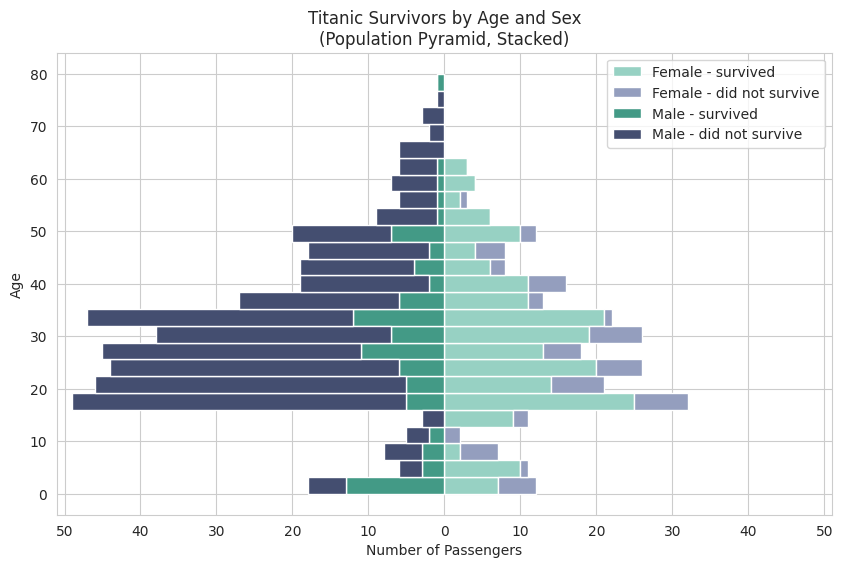

In [16]:
# Plot pyramid-style histogram of survival by age for male + female

# sort data
tf_male = titanic[titanic['sex'] == 'male']
tf_female = titanic[titanic['sex'] == 'female']

tf_m_s = tf_male[tf_male['survived'] == 1]['age'].dropna()
tf_m_n = tf_male[tf_male['survived'] == 0]['age'].dropna()

tf_f_s = tf_female[tf_female['survived'] == 1]['age'].dropna()
tf_f_n = tf_female[tf_female['survived'] == 0]['age'].dropna()

# assign colors
m_color=['#439A86','#444E70']
f_color=['#97D1C3','#949EBE']

plt.figure(figsize=(10, 6))

# create pyramid
plt.hist([tf_f_s,tf_f_n], bins=25, range=[0,80], orientation='horizontal', stacked=True, color=f_color, label=['Female - survived','Female - did not survive'])
plt.hist([tf_m_s,tf_m_n], bins=25, range=[0,80], orientation='horizontal', stacked=True, color=m_color, label=['Male - survived','Male - did not survive'],
         weights=[[-1] * len(tf_m_s),[-1] * len(tf_m_n)])
plt.title('Titanic Survivors by Age and Sex\n(Population Pyramid, Stacked)')
plt.ylabel('Age')
plt.xlabel('Number of Passengers')
plt.xlim(-51,51)
plt.xticks([-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50], [50, 40, 30, 20, 10, 0, 10, 20, 30, 40, 50])
plt.legend(loc='upper right')

plt.show()

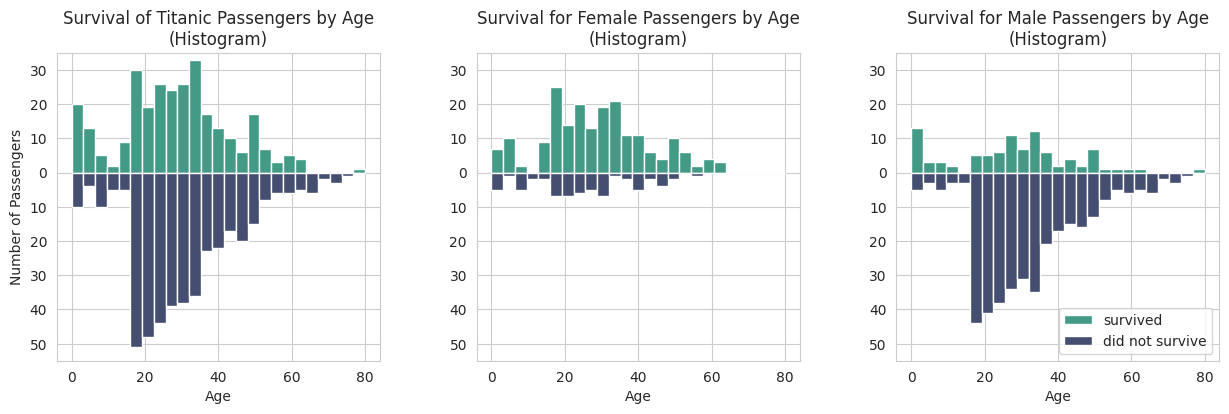

In [17]:
# Try alternate approach to displaying the data
# Plot sex disaggregated diverging histograms of survival by age for all + male + female
# Maintain same x and y limits for easier 1 to 1 visual comparison

plt.figure(figsize=(15, 4))
plt.subplots_adjust(wspace=0.3)

#All
plt.subplot(1, 3, 1)
plt.hist(titanic[titanic['survived'] == 1]['age'], bins=25, range=[0,80], color='#439A86', label='survived')
plt.hist(titanic[titanic['survived'] == 0]['age'], bins=25, range=[0,80], color='#444E70', label='did not survive',
         weights=[-1] * len(titanic[titanic['survived'] == 0]['age']))
plt.title('Survival of Titanic Passengers by Age\n(Histogram)')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.ylim(-55,35)
plt.yticks([-50, -40, -30, -20, -10, 0, 10, 20, 30], [50, 40, 30, 20, 10, 0, 10, 20, 30])

#Female
plt.subplot(1, 3, 2)
plt.hist(tf_female[tf_female['survived'] == 1]['age'], bins=25, range=[0,80], color='#439A86', label='survived')
plt.hist(tf_female[tf_female['survived'] == 0]['age'], bins=25, range=[0,80], color='#444E70', label='did not survive',
         weights=[-1] * len(tf_female[tf_female['survived'] == 0]['age']))
plt.title('Survival for Female Passengers by Age\n(Histogram)')
plt.xlabel('Age')
plt.ylim(-55,35)
plt.yticks([-50, -40, -30, -20, -10, 0, 10, 20, 30], [50, 40, 30, 20, 10, 0, 10, 20, 30])

#Male
plt.subplot(1, 3, 3)
plt.hist(tf_male[tf_male['survived'] == 1]['age'], bins=25, range=[0,80], color='#439A86', label='survived')
plt.hist(tf_male[tf_male['survived'] == 0]['age'], bins=25, range=[0,80], color='#444E70', label='did not survive',
         weights=[-1] * len(tf_male[tf_male['survived'] == 0]['age']))
plt.title('Survival for Male Passengers by Age\n(Histogram)')
plt.xlabel('Age')
plt.ylim(-55,35)
plt.yticks([-50, -40, -30, -20, -10, 0, 10, 20, 30], [50, 40, 30, 20, 10, 0, 10, 20, 30])

plt.legend(loc='lower right')

plt.show()

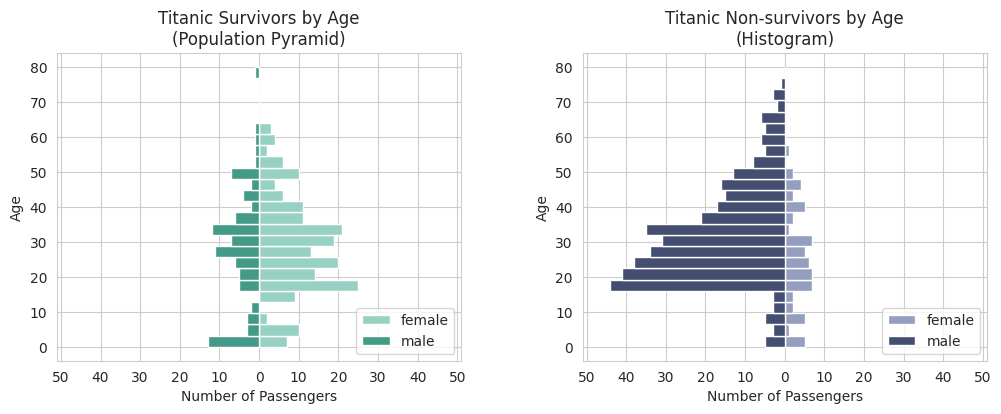

In [18]:
# Try another alternate approach to displaying the data
# Plot population pyramid of survival + non-survival by age
# Maintain same x and y limits for easier 1 to 1 visual comparison

plt.figure(figsize=(12, 4))
plt.subplots_adjust(wspace=0.3)

#Survived
plt.subplot(1, 2, 1)
plt.hist(tf_female[tf_female['survived'] == 1]['age'], bins=25, range=[0,80], orientation='horizontal', color='#97D1C3', label='female')
plt.hist(tf_male[tf_male['survived'] == 1]['age'], bins=25, range=[0,80], orientation='horizontal', color='#439A86', label='male',
         weights=[-1] * len(tf_male[tf_male['survived'] == 1]['age']))
plt.title('Titanic Survivors by Age\n(Population Pyramid)')
plt.ylabel('Age')
plt.xlabel('Number of Passengers')
plt.xlim(-51,51)
plt.xticks([-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50], [50, 40, 30, 20, 10, 0, 10, 20, 30, 40, 50])
plt.legend(loc='lower right')

#Did Not Survive
plt.subplot(1, 2, 2)
plt.hist(tf_female[tf_female['survived'] == 0]['age'], bins=25, range=[0,80], orientation='horizontal', color='#949EBE', label='female')
plt.hist(tf_male[tf_male['survived'] == 0]['age'], bins=25, range=[0,80], orientation='horizontal', color='#444E70', label='male',
         weights=[-1] * len(tf_male[tf_male['survived'] == 0]['age']))
plt.title('Titanic Non-survivors by Age\n(Histogram)')
plt.ylabel('Age')
plt.xlabel('Number of Passengers')
plt.xlim(-51,51)
plt.xticks([-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50], [50, 40, 30, 20, 10, 0, 10, 20, 30, 40, 50])
plt.legend(loc='lower right')

plt.show()

## Optional Task: Exploring Additional Visualizations

###7.  **Task 7 (Optional): Bar Graph, Line Plot, and Scatter Plot**  
   - Create a bar graph, line plot, and scatter plot using the Titanic dataset.  
   - *Suggestions*: You can explore variables like survival rates, passenger class, age, or fare in these plots.
   - *Question*: What additional insights do these visualizations provide that weren't evident from the histograms and KDE plots?

#### 🔷 Response to Task 7 Question

In my **scatter plot**, I investigated whether there is any correlation between age and fare. Based on the resulting plot, it doesn't appear that there's any relationship.

For my **bar graph**, I explored how many total passengers were from each of the embark towns, since that was a variable we hadn't yet looked at. Southampton was the primary town for passengers to embark from. Cherbourg and Queenstown together contributed less than 1/3 of the Titanic's passengers.

Finally, I created **line plots** for the survival rates of All Passengers, Women & Children, and Adult Men compared to their classes. We already saw that the survival rate for passengers increased based on their class, but this line plot give a more accurate value for the actual suvival rate. I was also interested in understanding how much the combination of class and being an adult male impacted the survival rate. As expected, being in First Class increased a man's chance of survival, but being in Second Class had no apparent impact. The survival rate for men in First Class is around triple that of men in either Second or Third. For women & children, however, being in either First or Second Class nearly doubled their survival rate compared to Third. It was fascinating to see that the impact of class on survival rates was extremely different between Men and Women & Children. I was also slightly surprised to see that the survival rate of Men in First Class was still below that of Women & Children in any class. This suggests that they generally did adhere the "women & children first" principle.

#### Scatter Plot

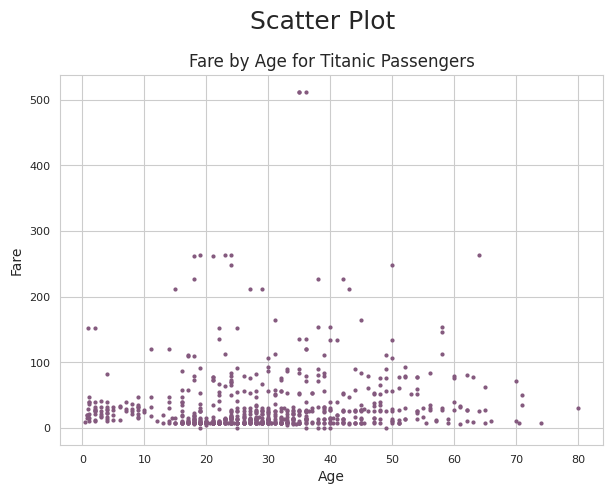

In [19]:
# Create scatter plot of age and fare to identify any correlation

plt.figure(figsize=(7, 5))
plt.subplots_adjust(wspace=0.3, top=0.85)
plt.suptitle('Scatter Plot', fontsize=18)

plt.subplot(1, 1, 1)
plt.scatter(titanic['age'],titanic['fare'],
            s=4, color='#84597e')
plt.xlabel('Age')
plt.xticks(fontsize=8)
plt.ylabel('Fare')
plt.yticks(fontsize=8)
plt.title('Fare by Age for Titanic Passengers')

plt.show()

#### Bar Graph

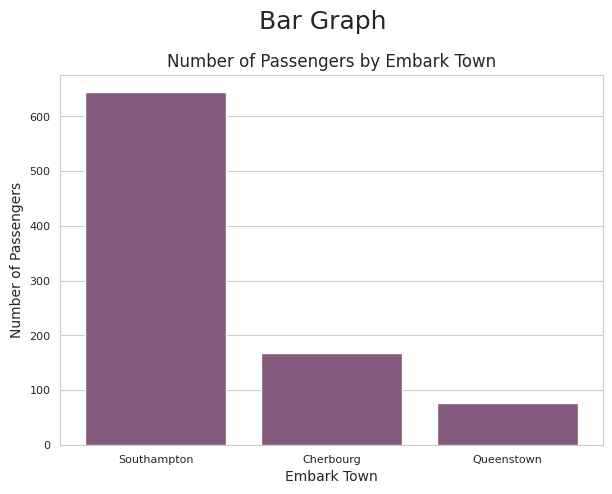

In [20]:
# Create bar graph of passenger counts from each embark town

origins = titanic['embark_town']
origins_counts = origins.value_counts()

plt.figure(figsize=(7, 5))
plt.subplots_adjust(top=0.85)
plt.suptitle('Bar Graph', fontsize=18)

plt.subplot(1, 1, 1)

plt.bar(origins_counts.index, origins_counts.values, color='#84597e', zorder=2)
plt.grid(axis='y', zorder=0)
plt.xlabel('Embark Town')
plt.xticks(fontsize=8)
plt.ylabel('Number of Passengers')
plt.yticks(fontsize=8)
plt.title('Number of Passengers by Embark Town')
plt.grid(axis='x', visible=False)

plt.show()

#### Line Plot

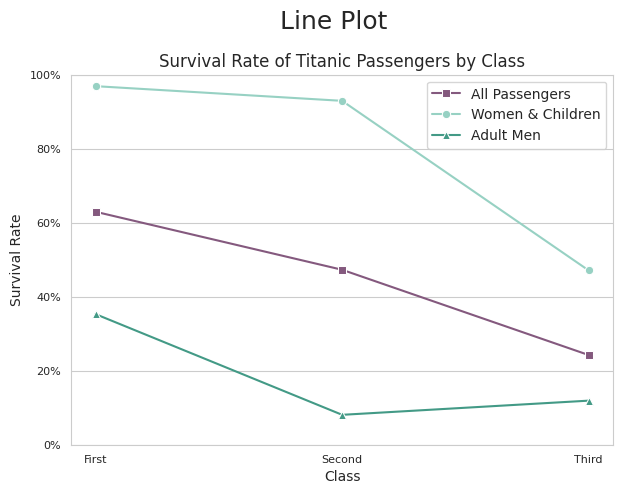

In [21]:
# Create line plot of survival rates by class for All + Adult Male + Women & Children

tf_am = titanic[titanic['adult_male'] == True]
tf_fc = titanic[titanic['adult_male'] == False]

survival_rate_class = titanic.groupby('pclass')['survived'].mean()
survival_rate_class_fc = tf_fc.groupby('pclass')['survived'].mean()
survival_rate_class_am = tf_am.groupby('pclass')['survived'].mean()

plt.figure(figsize=(7, 5))
plt.subplots_adjust(wspace=0.3, top=0.85)
plt.suptitle('Line Plot', fontsize=18)

plt.subplot(1, 1, 1)

sns.lineplot(x=survival_rate_class.index, y=survival_rate_class.values, marker='s', color='#84597e', label='All Passengers')
sns.lineplot(x=survival_rate_class_fc.index, y=survival_rate_class_fc.values, marker='o', color='#97D1C3', label='Women & Children')
sns.lineplot(x=survival_rate_class_am.index, y=survival_rate_class_am.values, marker='^', color='#439A86', label='Adult Men')

plt.xlabel('Class')
plt.xticks([1,2,3],['First','Second','Third'], fontsize=8)
plt.ylim(0,1)
plt.ylabel('Survival Rate')
plt.yticks([0,0.2,0.4,0.6,0.8,1],['0%','20%','40%','60%','80%','100%'], fontsize=8)
plt.title('Survival Rate of Titanic Passengers by Class')
plt.legend()
plt.grid(axis='x', visible=False)

plt.show()